In [40]:
import requests
from bs4 import BeautifulSoup as bs1
from bs4 import BeautifulSoup as bs2
import pandas as pd

def extraer_precios(array_strings):
  precios = []
  for string in array_strings:
    precio = ""
    guardar = False
    if string == 'null':
      precios.append('null')
    else:
      for caracter in str(string):
        if caracter == ' ':
          guardar = False
        if caracter == "$":
          guardar = True
        if guardar:
          precio += caracter
      precio = precio.strip()
      if precio != '':
        precio = precio.replace('$', '')
        precio = precio.replace('.', '')
        precio = int(precio)
        precios.append(precio)
  return precios


def arreglarPorcentaje(valor):
    for i in range(len(valor["Precio anterior"])):
        if valor["Precio anterior"][i] == '':
            valor["Porcentaje"].insert(i, "0%")
    return valor["Porcentaje"]

def obtenerTexto(elementos):
    listado = []
    for i in elementos:
      if i == 'null':
        listado.append('null')
      else:
        i = i.getText()
        i = str(i).strip()
        if i != '':
          listado.append(i)
        else:
          listado.append('null')
          print("NULL")
    return listado

def limpiar_link(array_strings):
  links = []
  for string in array_strings:
    guardar = True
    string = str(string)
    link = ""
    substring = string[22:]
    for caracter in substring:
      if caracter == '"':
        guardar = False
      if guardar:
        link += caracter
    links.append(link)
  return links

def obtenerAtributos(links, string):
  atributos = []
  for link in links:
    pagina_producto = requests.get("https://www.moov.com.ar" + str(link))
    producto_sopa = bs1(pagina_producto.content, 'html.parser')
    material = producto_sopa.find_all('ul', class_="row")
    if material == []:
      atributos.append('null')
    for i in material:
      ficha_tecnica_sopa = bs1(str(i), 'html.parser')
      atributos_ficha = ficha_tecnica_sopa.find_all('span', class_="label", text= string)
      if len(atributos_ficha) == 0:
        atributos.append('null')
      else:
        for j in atributos_ficha:
          j = j.find_parent('p').get_text(strip=True).replace(string, '').strip()
          atributos.append(j)
  return atributos

def arreglar_porcentaje(valores):
  porcentajes = []
  for porcentaje in valores:
    if porcentaje == 'null':
      porcentajes.append('null')
    else:
      porcentaje = porcentaje[:-1]
      porcentajes.append(porcentaje)
  return porcentajes

diccionario={}

paginas = ['https://www.moov.com.ar/categorias/nikesale?mi=hm_hor2_nikesale_240610&psn=Horizontal_2', 'https://www.moov.com.ar/marcas/adidas-originals/saleadidas?mi=hm_hor1_adisale_240618&psn=Horizontal_1', 'https://www.moov.com.ar/marcas/puma/pumasale?mi=hm_hor2_pumasale_240618&psn=Horizontal_2']
nombres = []
precios = []
precios_con_descuento = []
porcentajes = []
links = []
materiales = []
for i in paginas:
  pagina = requests.get(i)
  objeto_sopa = bs1(pagina.content, 'html.parser')
  productos = objeto_sopa.find_all('div', class_="product")
  for producto in productos:
    nombre = producto.find_all('a', class_="link")
    nombre = obtenerTexto(nombre)
    nombres.append(nombre[0])
    precio = producto.find_all('span', class_="value")
    if (len(precio) == 1):
      precios.append('null')
    else:
      precios.append(precio)
    precio_con_descuento = producto.find_all('span', class_="sales")
    precios_con_descuento.append(precio_con_descuento)
    porcentaje = producto.find_all('fieldset')
    if porcentaje == []:
      porcentajes.append('null')
    else:
      porcentajes.append(porcentaje[0])
    link = producto.find_all('a', class_='link')
    links.append(link[0])
links = limpiar_link(links)
materiales = obtenerAtributos(links,"Material:")
marcas = obtenerAtributos(links,"Marca:")
precios = extraer_precios(precios)
precios_con_descuento = extraer_precios(precios_con_descuento)
porcentajes = obtenerTexto(porcentajes)
porcentajes = arreglar_porcentaje(porcentajes)

diccionario['nombre'] = nombres
diccionario['precio'] = precios
diccionario['precio_con_descuento'] = precios_con_descuento
diccionario['porcentaje'] = porcentajes
diccionario['material'] = materiales
diccionario['marca'] = marcas

data = pd.DataFrame(diccionario)
print(data)
data.to_csv("./webscraping.csv")





<ipython-input-40-e538ecc24b0c>:76: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  atributos_ficha = ficha_tecnica_sopa.find_all('span', class_="label", text= string)


                                             nombre  precio  \
0    Zapatillas Nike Air Force 1 High 07 Lv8 Hombre  269299   
1         Zapatillas Nike Dunk High Retro Se Hombre  239399   
2              Remera Urbana Nike Sportswear Hombre   45999   
3                   Buzo Nike Sportswear Icon Clash  135599   
4             Zapatillas Nike Air Max Flyknit Racer  300199   
..                                              ...     ...   
103          Remera Urbana Puma Swxp Graphic Hombre   29699   
104        Remera Urbana Puma Classics Block Hombre   47399   
105        Remera Urbana Puma Classics Block Hombre   47399   
106          Remera Puma Classics Oversized I Mujer   39999   
107                   Remera Puma Showcase 2 Hombre   50499   

     precio_con_descuento porcentaje              material marca  
0                  215999         19                  Tela  Nike  
1                  191999         19       cuero sintético  Nike  
2                   32199         30      

                                             nombre    precio  \
0    Zapatillas Nike Air Force 1 High 07 Lv8 Hombre  269299.0   
1         Zapatillas Nike Dunk High Retro Se Hombre  239399.0   
2              Remera Urbana Nike Sportswear Hombre   45999.0   
3                   Buzo Nike Sportswear Icon Clash  135599.0   
4             Zapatillas Nike Air Max Flyknit Racer  300199.0   
..                                              ...       ...   
103          Remera Urbana Puma Swxp Graphic Hombre   29699.0   
104        Remera Urbana Puma Classics Block Hombre   47399.0   
105        Remera Urbana Puma Classics Block Hombre   47399.0   
106          Remera Puma Classics Oversized I Mujer   39999.0   
107                   Remera Puma Showcase 2 Hombre   50499.0   

     precio_con_descuento  porcentaje              material marca  
0                  215999        19.0                  Tela  Nike  
1                  191999        19.0       cuero sintético  Nike  
2              

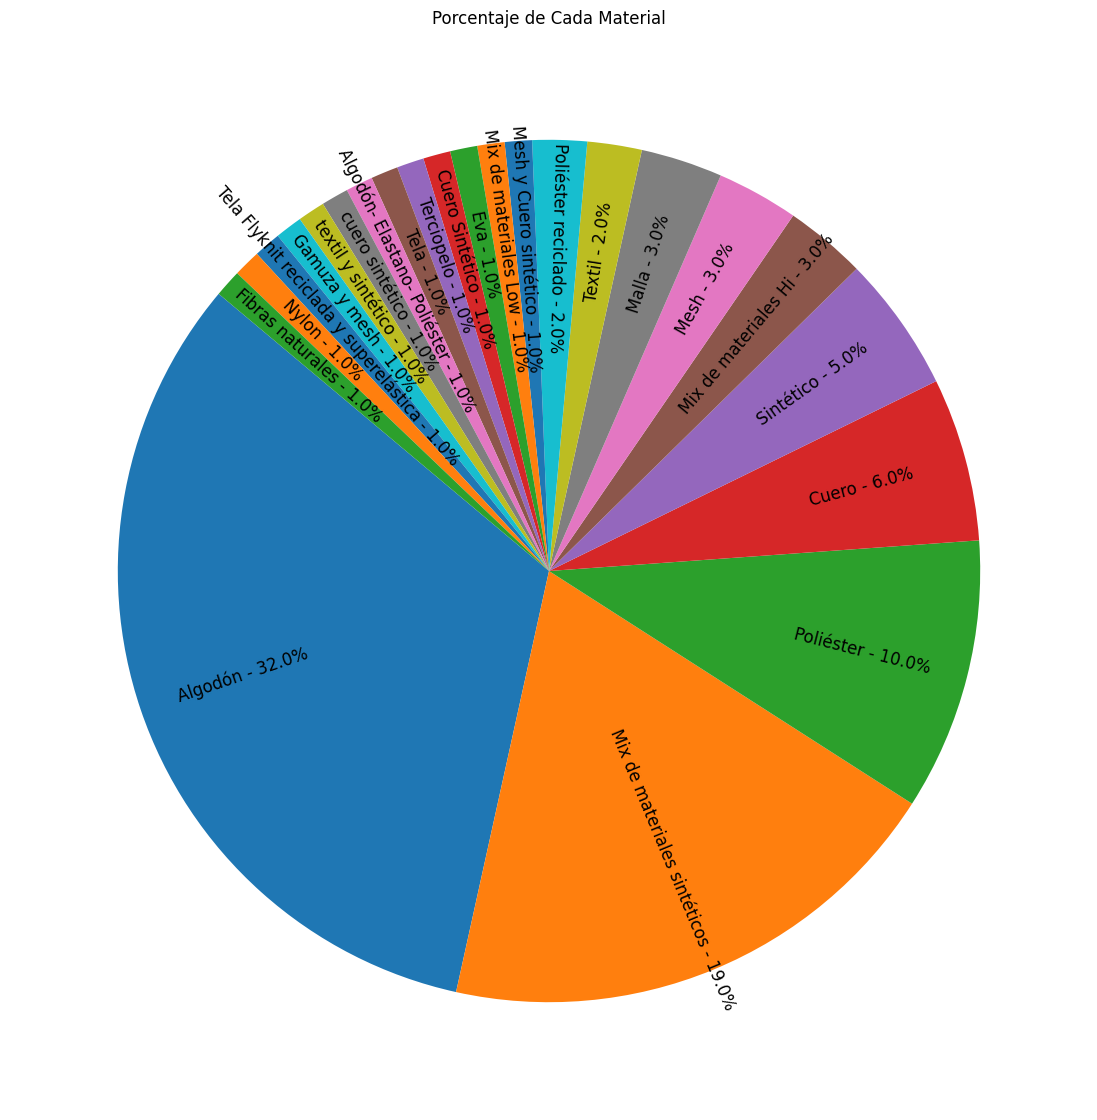

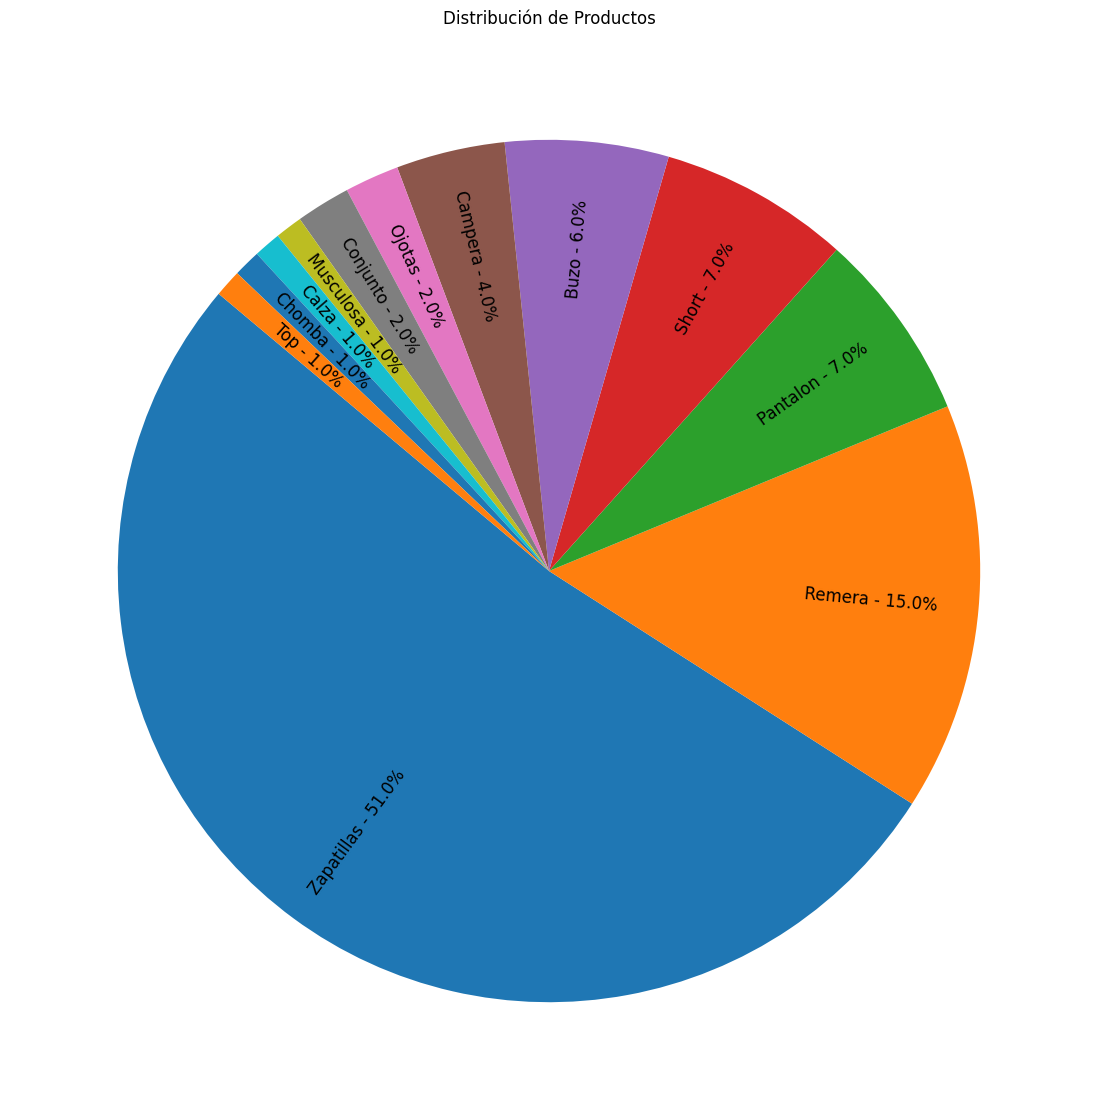

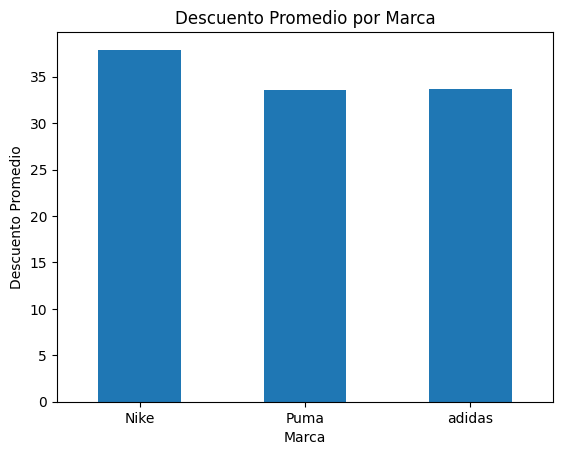

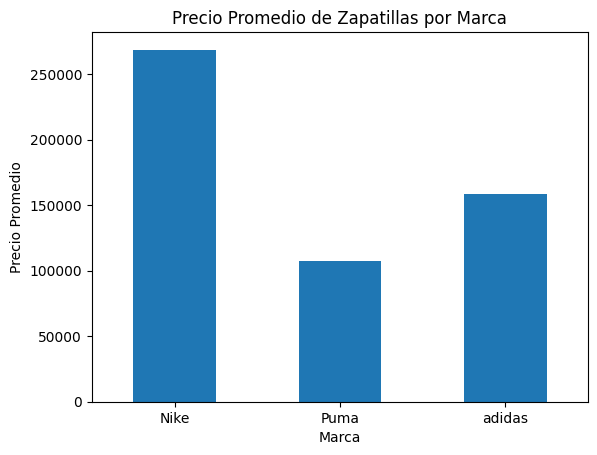

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

csv = pd.read_csv('./webscraping.csv')

def eliminarNull(valor):
  if valor == 'null':
    valor = np.nan
  return valor

csv = csv.applymap(eliminarNull)
csv = csv.dropna()
csv.to_csv('./webscraping_limpio.csv')
csv = csv.drop(columns=['Unnamed: 0'])
print(csv)

csv = pd.read_csv('./webscraping_limpio.csv')

material_counts = csv['material'].value_counts()
plt.figure(figsize=(14,14))
patches, _ = plt.pie(material_counts, labels=None, startangle=140)
labels = material_counts.index
# 292.4489766359329 or angle > 441.2244886532426:
for i, (patch, label) in enumerate(zip(patches, labels)):
    angle = (patch.theta2 + patch.theta1) / 2.
    theta = np.deg2rad(angle)
    x = patch.r * 0.75 * np.cos(theta)
    y = patch.r * 0.75 * np.sin(theta)
    rotation = np.degrees(theta)
    if angle < 292.4489766359329 or angle > 441.2244886532426:
      if angle > 90 and angle < 270:
          rotation -= 180
      if rotation > 90:
          rotation -= 180
      elif rotation < -90:
          rotation += 180
    text = f'{label} - {material_counts[i]:.1f}%'
    plt.text(x, y, text, ha='center', va='center', rotation=rotation, fontsize=12)
plt.title('Porcentaje de Cada Material')
plt.show()

csv['first_word'] = csv['nombre'].str.split().str[0]
csv['first_word'] = csv['first_word'].apply(unidecode)
first_word_counts = csv['first_word'].value_counts()
plt.figure(figsize=(14, 14))
patches, _ = plt.pie(first_word_counts, labels=None, startangle=140)
labels = first_word_counts.index
for i, (patch, label) in enumerate(zip(patches, labels)):
    angle = (patch.theta2 + patch.theta1) / 2.
    theta = np.deg2rad(angle)
    x = patch.r * 0.75 * np.cos(theta)
    y = patch.r * 0.75 * np.sin(theta)
    rotation = np.degrees(theta)
    if angle < 292.4489766359329 or angle > 444.8979586362839:
      if angle > 90 and angle < 270:
          rotation -= 180
      if rotation > 90:
          rotation -= 180
      elif rotation < -90:
          rotation += 180
    text = f'{label} - {first_word_counts[i]:.1f}%'
    plt.text(x, y, text, ha='center', va='center', rotation=rotation, fontsize=12)
plt.title('Distribución de Productos')
plt.show()

promedio_precios = csv.groupby('marca')['porcentaje'].mean()
promedio_precios.plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Descuento Promedio')
plt.title('Descuento Promedio por Marca')
plt.xticks(rotation=0)
plt.show()

zapatillas = csv[csv['nombre'].str.contains('Zapatillas')]
promedio_precios = zapatillas.groupby('marca')['precio'].mean()
promedio_precios.plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de Zapatillas por Marca')
plt.xticks(rotation=0)
plt.show()

Como podemos ver en lo gráficos, el producto que más frecuenta en el sale son las zapatillas de las cuales las más caras suelen ser de Nike y por lo tanto es la marca que tiene los descuentos más altos. El material con el que más están hechos los productos es con algodón, aunque no es la mayoría y los materiales sintéticos predominan.